# Exploratory Data Analysis

## Laura Gagnon-Vos
## 07/17/2024

This notebook contains exploratory data analysis for the dataset, Sleep Health and Lifestyle.

## Read in Dataset and View

In [48]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in csv
df = pd.read_csv('Sleep_health_and_lifestyle_dataset_cleaned.csv', na_values=[' ','N/A','Null'], keep_default_na=False)
print(df.head())

#check for missing values
print(df.isnull().values.any())

#print(df['Sleep Disorder'].iloc[0])
#print(type(df['Sleep Disorder'].iloc[0]))


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8   Overweight   
4                 4                       30             8   Overweight   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  \
0         126/83          77         4200           None   
1         125/80          75    

In [19]:
#get info on data type and summary statistics
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Overall Exercise Level   374 non-null    object 
dtypes: float64(1), int64(7), o

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.sample(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Overall Exercise Level
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High
321,322,Female,53,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None,Medium
101,102,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,None,High
345,346,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,High
209,210,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,None,High
221,222,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia,Medium
74,75,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None,Medium
300,301,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None,Medium
210,211,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,None,High
143,144,Female,38,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None,High


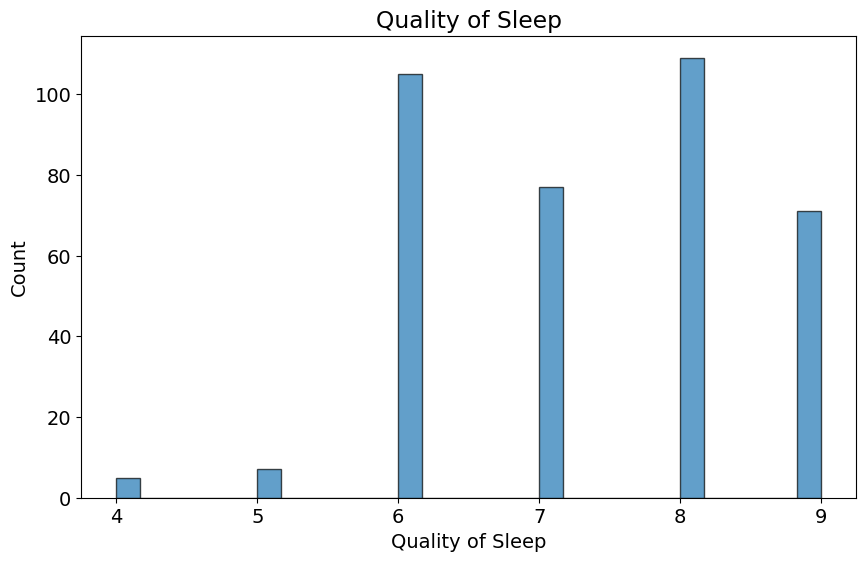

In [11]:
#pd.set_option('display.max_columns', None)
#plt.rc('font', size=14)

# Plot the histogram for life expectancy
#plt.figure(figsize=(10, 6))
#plt.hist(df['Quality of Sleep'], bins=30, edgecolor='k', alpha=0.7)
#plt.xlabel("Quality of Sleep")
#plt.ylabel("Count")
#plt.title("Quality of Sleep")
#plt.show()

## Show Distributions with Histograms

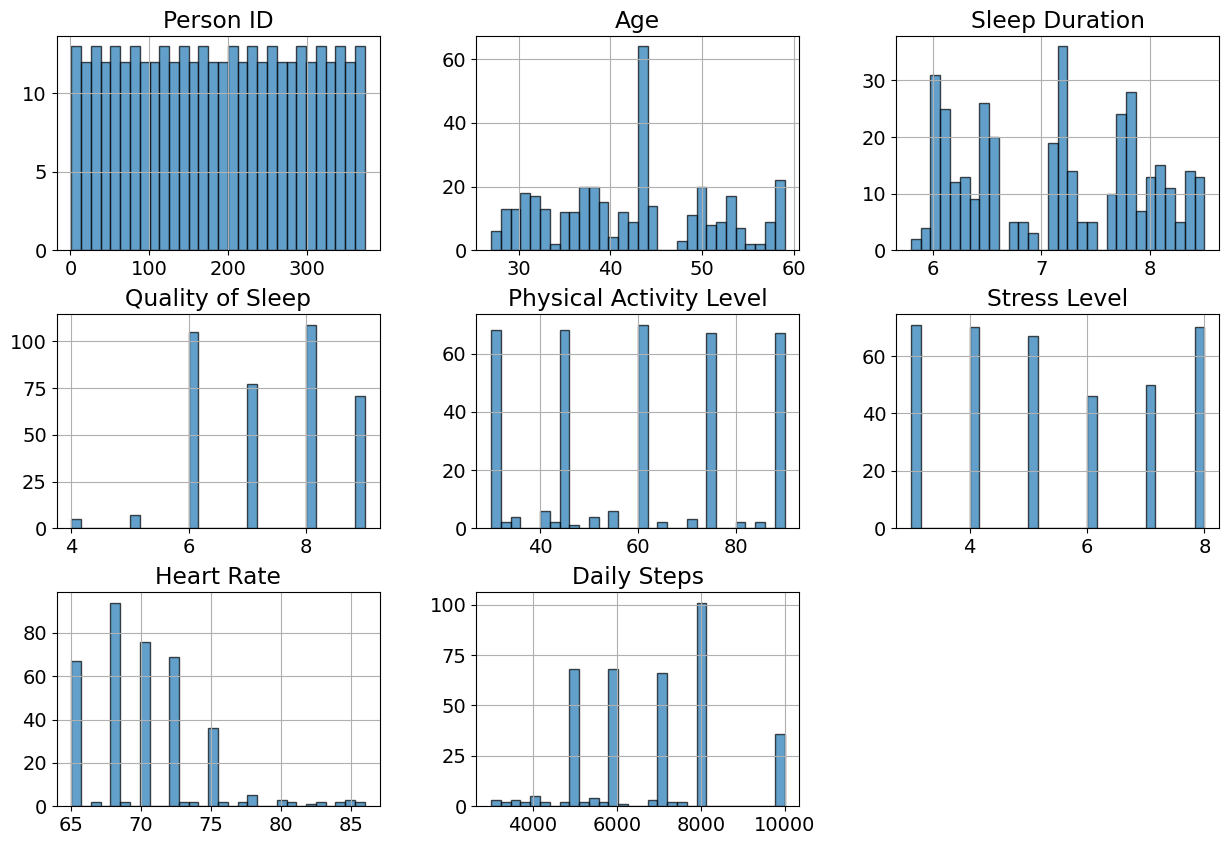

In [47]:
#plot histograms for attributes with numerical data

df.hist(figsize=(15, 10), bins=30, edgecolor='black',alpha=0.7)
#plt.tight_layout()
plt.show()


## Show Distributions for Categorical Data

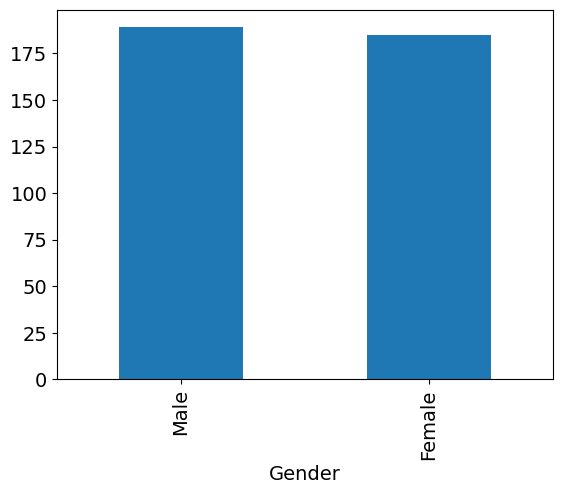

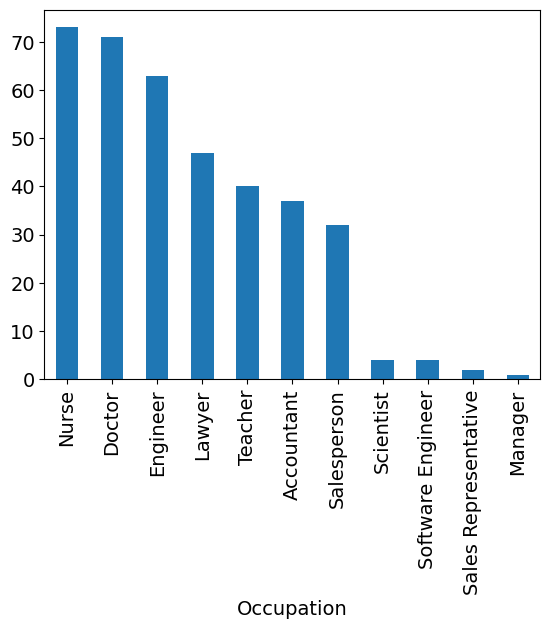

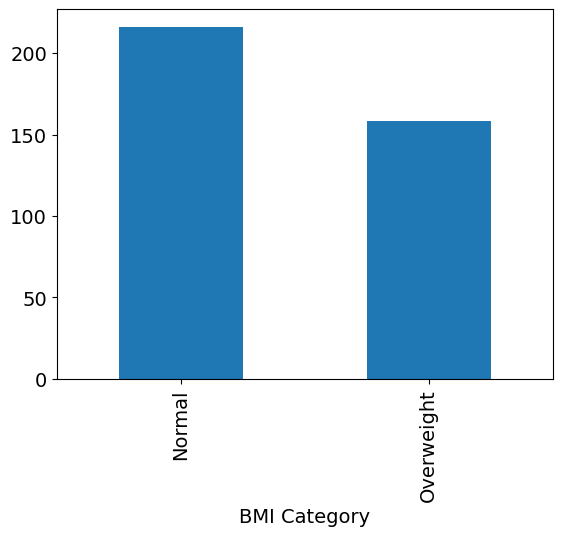

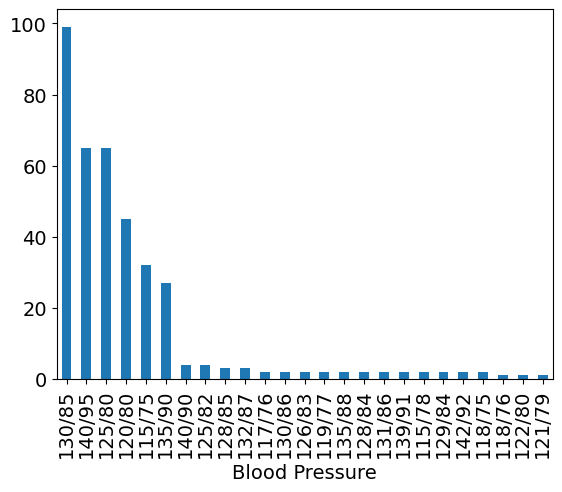

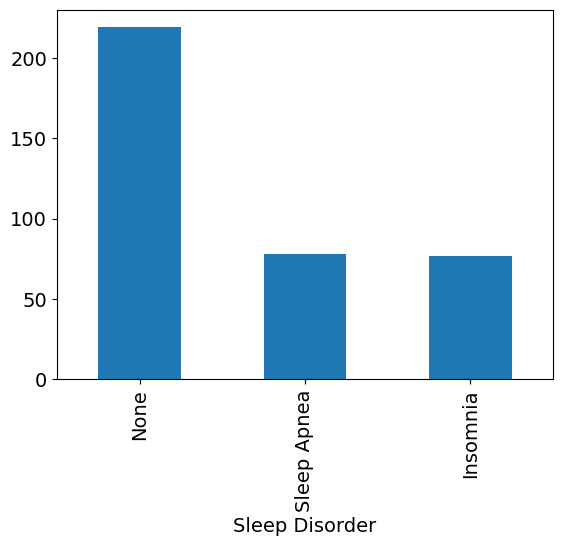

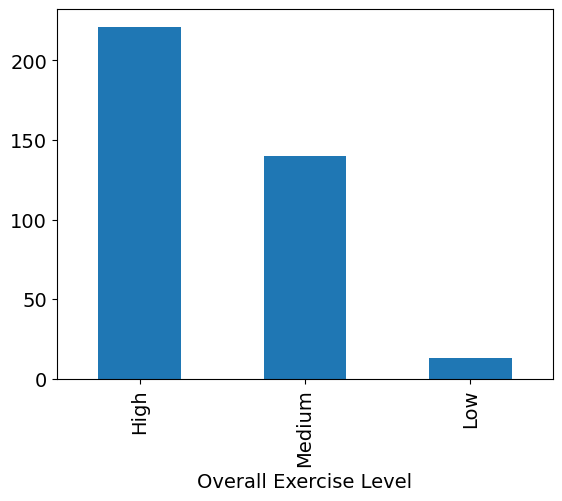

In [77]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()
plt.tight_layout()
df['Occupation'].value_counts().plot(kind='bar')
plt.show()
df['BMI Category'].value_counts().plot(kind='bar')
plt.show()
df['Blood Pressure'].value_counts().plot(kind='bar')
plt.show()
df['Sleep Disorder'].value_counts().plot(kind='bar')
plt.show()
df['Overall Exercise Level'].value_counts().plot(kind='bar')
plt.show()


## Correlation Analysis

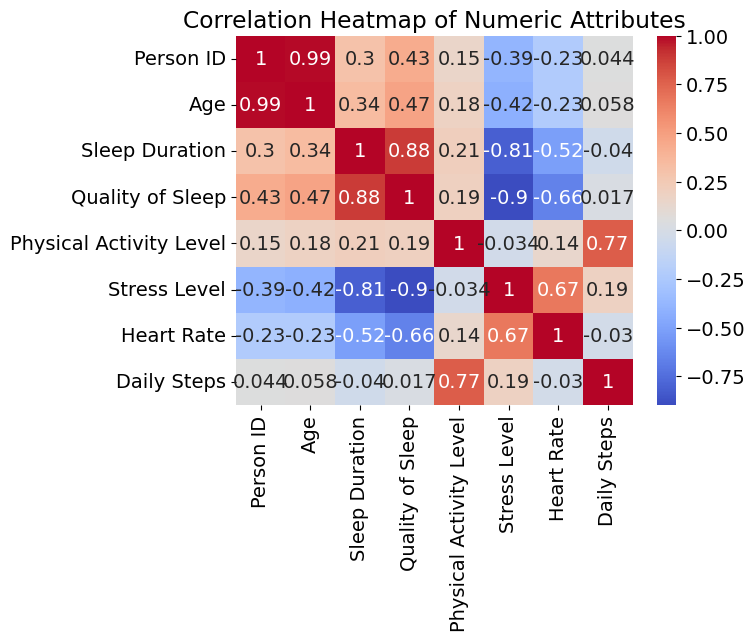

In [55]:
# make a dataframe for numeric attributes
num_df=  df.select_dtypes(include = ['int64','float'])

# make correlation matrix heatmap
plt.figure
correlation=num_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

In [72]:
df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean()

,Sleep Disorder,Quality of Sleep
0,Insomnia,6.532468
1,None,7.625571
2,Sleep Apnea,7.205128


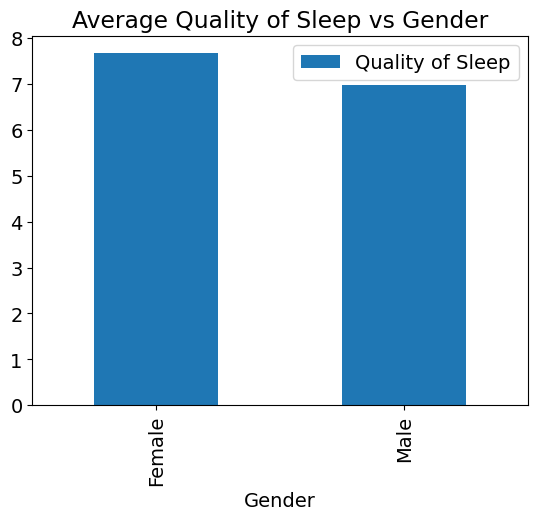

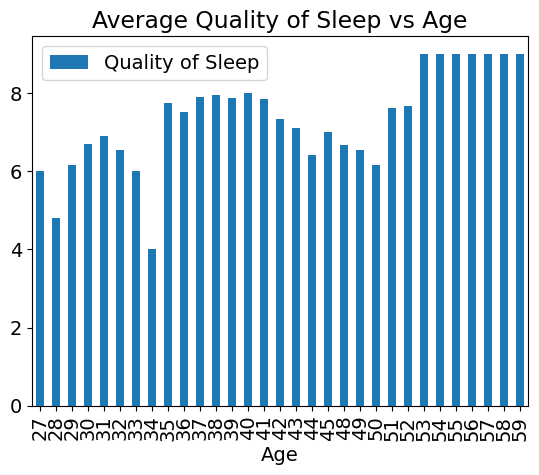

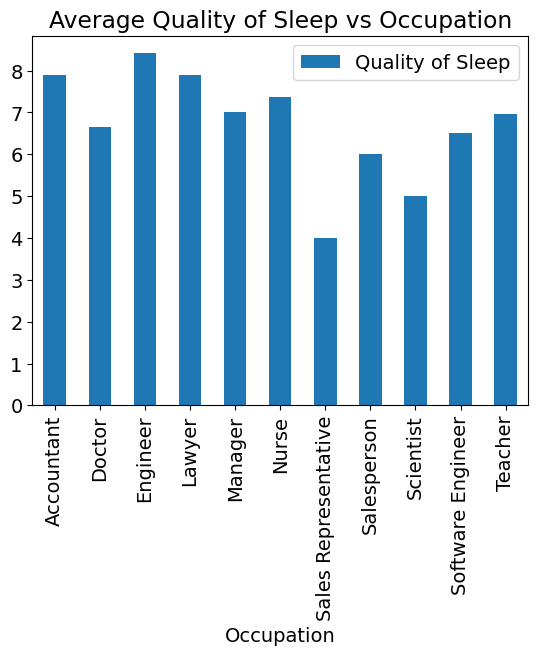

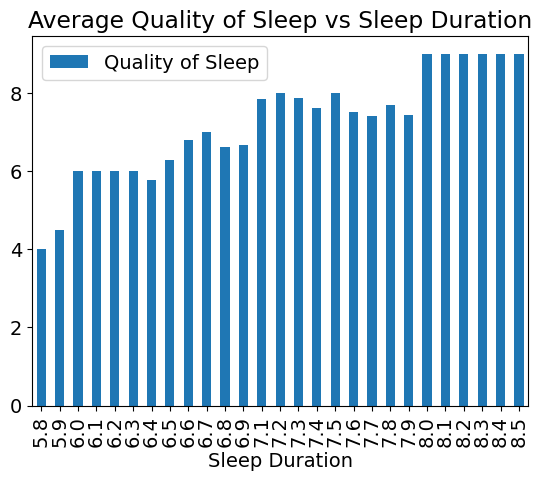

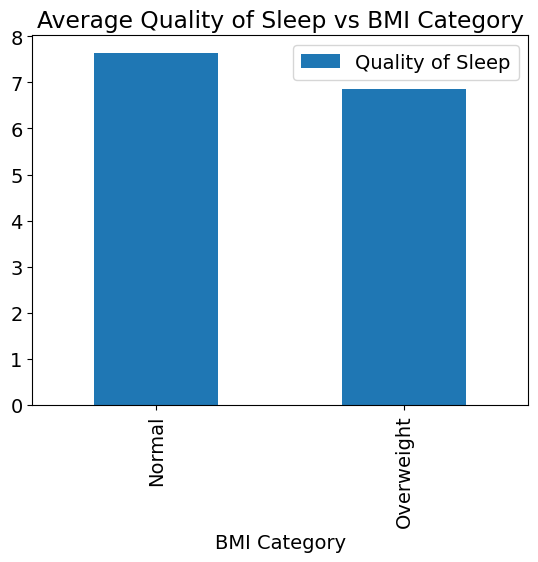

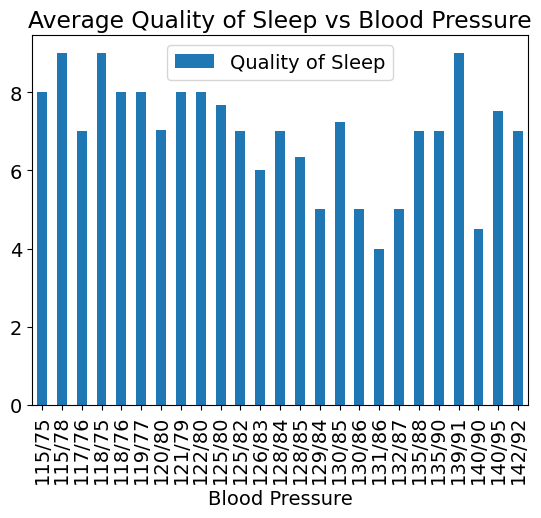

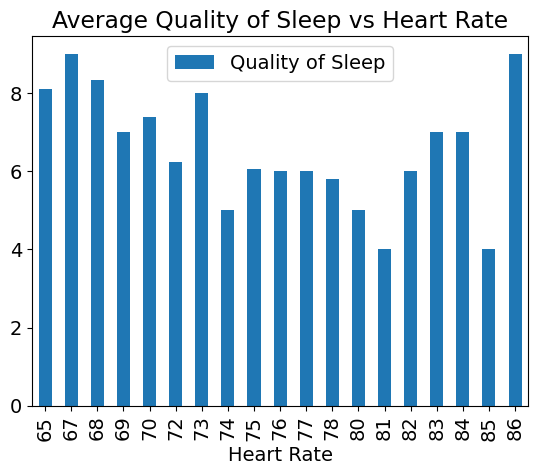

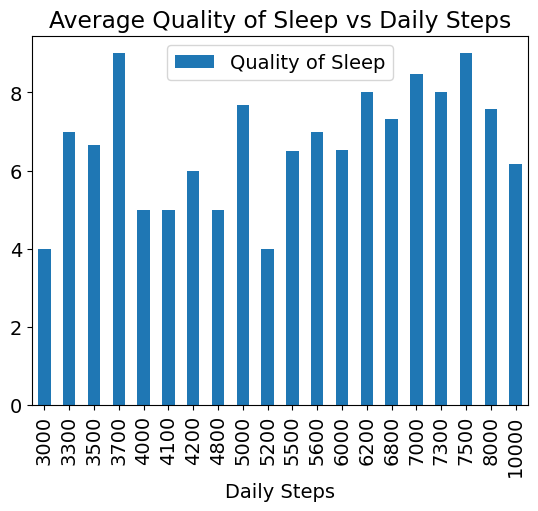

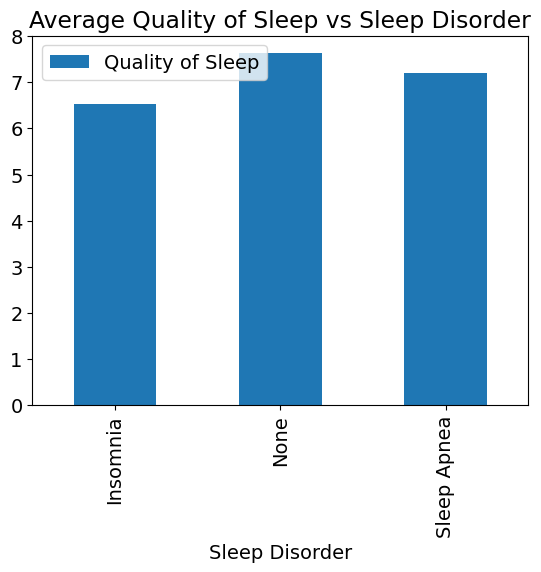

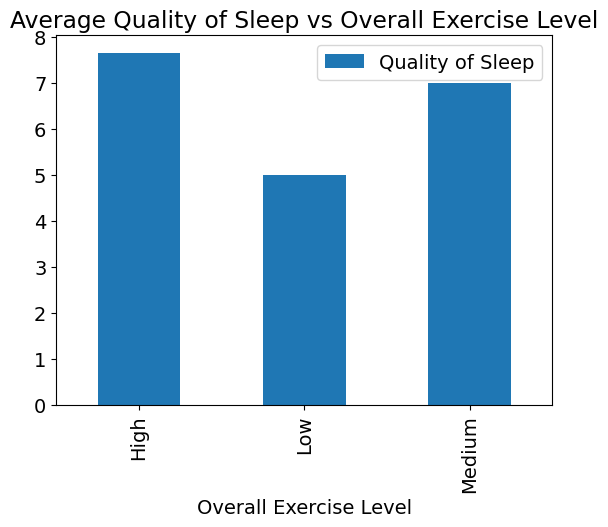

In [86]:
#df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean().plot.bar(x='Sleep Disorder',title='Average Quality of Sleep')
df.groupby('Gender', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Gender', y='Quality of Sleep', title='Average Quality of Sleep vs Gender')
plt.show()
df.groupby('Age', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Age', y='Quality of Sleep', title='Average Quality of Sleep vs Age')
plt.show()
df.groupby('Occupation', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Occupation', y='Quality of Sleep', title='Average Quality of Sleep vs Occupation')
plt.show()
df.groupby('Sleep Duration', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Sleep Duration', y='Quality of Sleep', title='Average Quality of Sleep vs Sleep Duration')
plt.show()
df.groupby('BMI Category', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='BMI Category', y='Quality of Sleep', title='Average Quality of Sleep vs BMI Category')
plt.show()
df.groupby('Blood Pressure', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Blood Pressure', y='Quality of Sleep', title='Average Quality of Sleep vs Blood Pressure')
plt.show()
df.groupby('Heart Rate', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Heart Rate', y='Quality of Sleep', title='Average Quality of Sleep vs Heart Rate')
plt.show()
df.groupby('Daily Steps', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Daily Steps', y='Quality of Sleep', title='Average Quality of Sleep vs Daily Steps')
plt.show()
df.groupby('Sleep Disorder', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Sleep Disorder', y='Quality of Sleep', title='Average Quality of Sleep vs Sleep Disorder')
plt.show()
df.groupby('Overall Exercise Level', as_index=False)['Quality of Sleep'].mean().plot(kind='bar',x='Overall Exercise Level', y='Quality of Sleep', title='Average Quality of Sleep vs Overall Exercise Level')
plt.show()